# LOAD PACKAGES AND HELPER FUNCTIONS

Load packages and necessary functions.

In [23]:
from clustering_functions import load_camera_data, plot_specs, plot_hierarchical_clustering_dendrogram, drop_data, score_hier_numbers_of_clusters, score_kmeans_numbers_of_clusters, plot_clusters_into_triangles, compute_cluster_mean_std, plot_cluster_mean_spectra, extract_most_typical_sample,highlight_samples_in_cluster_triangle,plot_spectra, compute_cluster_compositional_mean, extract_compos_centroid_sample, create_csmafapbi_compos_str

def rgb_timeseries_plot_for_paper(cleaned_data, k, time, mean, std, cluster_rep,
                                  cluster_colors, save_fig = True,
                                  filename = 'rgb_timeseries'):
    
    series_length = int(cleaned_data.shape[1]/3)
    
    # Data sliced into color channels.
    rgb_sl = []
    mean_sl = []
    std_sl = []

    for i in range(3): # R, G, B
        
        # Color data for this channel.
        rgb_ch = cleaned_data.iloc[:, i*series_length : (i+1)*series_length]
        rgb_sl.append(rgb_ch)
        
        mean_sl.append([])
        std_sl.append([])
        
        for j in range(k): # Cluster
            
            # Mean and st.dev data for this channel and cluster.
            mean_ch = mean[j][i*series_length : (i+1)*series_length]
            std_ch = std[j][i*series_length : (i+1)*series_length]
            
            mean_sl[-1].append(mean_ch)
            std_sl[-1].append(std_ch)
            
    for channel in range(3):
        
        plt.figure()
        legend_content = []
        
        for i in range(k):
            
            plt.plot(time, mean_sl[channel][i], '-', c = cluster_colors[i])
            legend_content.extend(['Cluster ' + str(i) + ' mean'])

        for i in range(k):
            plt.fill_between(time, mean_sl[channel][i] - std_sl[channel][i],
                             mean_sl[channel][i] + std_sl[channel][i],
                             color = cluster_colors[i], alpha=0.2, edgecolor = None)
            # Printing only every 10th point makes the plot look nicer.
            plt.plot(time[::10],
                     rgb_sl[channel].iloc[cluster_rep[i],::10],
                            linestyle=(0,(3,5)), c = cluster_colors[i], linewidth=1)
            if i == 0:
                legend_content.extend(['St. dev.', 'RGB centroid'])

        plt.ylim((30,150))
        plt.xlabel('Aging time (hours)')
        plt.ylabel('Color in RGB (px)')
        if channel == 0:
            color = 'R'
        elif channel == 1:
            color = 'G'
        elif channel == 2:
            color = 'B'
        plt.text(48, 140, color)

        fig = plt.gcf()
        fig.set_size_inches(1.7, 2.9)
        plt.tight_layout()

        if save_fig == True:
            plt.savefig(filename + color + '.png')
            plt.savefig(filename + color + '.svg')
            plt.savefig(filename + color + '.pdf')

        plt.show()


# LOAD DATA

In [24]:
    # Load RGB data with a data loader specified for the dataset under
    # investigation.
    data, compositions, time, sample_df, idx_dropped = load_camera_data(
        n_timepoints = 1200)

    # Set cluster colors for the plots and calculate the xy coordinates of each
    # composition in the tetragonal plots. Works only for tetragonal materials
    # spaces.
    xy, cluster_colors = plot_specs(compositions)
    # Let's swap colors 0 and 2 to be compatible with the colors in XRD data.
    cluster_colors[0], cluster_colors[2] = cluster_colors[2], cluster_colors[0]

Number of samples and aging tests:  (28, 6)
Samples consist of:      CsPbI  FAPbI  MAPbI
0    0.75   0.00   0.25
1    0.00   1.00   0.00
2    0.50   0.00   0.50
3    1.00   0.00   0.00
4    0.50   0.50   0.00
5    0.00   1.00   0.00
6    0.50   0.00   0.50
7    1.00   0.00   0.00
8    0.00   0.75   0.25
9    0.00   0.75   0.25
10   0.25   0.75   0.00
11   0.75   0.25   0.00
12   0.00   0.50   0.50
13   0.00   0.50   0.50
14   0.25   0.50   0.25
15   0.75   0.00   0.25
16   0.00   0.25   0.75
17   0.00   0.25   0.75
18   0.25   0.25   0.50
19   0.50   0.50   0.00
20   0.25   0.50   0.25
21   0.00   0.00   1.00
22   0.25   0.00   0.75
23   0.50   0.25   0.25
24   0.25   0.25   0.50
25   0.00   0.00   1.00
26   0.75   0.25   0.00
27   0.50   0.25   0.25
These indices contain discarded samples and are dropped from the analysis:  []
Shape after colors stacked:  (28, 3600)
Number of samples and aging tests:  (28, 7)
Samples consist of:      CsPbI  FAPbI  MAPbI
0    0.98   0.00   0.02
1    0.

/home/armi/Downloads/cluster-perovskite-data-main/clustering_functions.py:178: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compositions = compositions.append(sample_df[i].loc[:, materials], ignore_index = True)
/home/armi/Downloads/cluster-perovskite-data-main/clustering_functions.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_df_all = sample_df_all.append(sample_df[i], ignore_index = True)


Number of samples and aging tests:  (28, 6)
Samples consist of:      CsPbI  FAPbI  MAPbI
0    0.39   0.61   0.00
1    0.89   0.00   0.11
2    0.63   0.37   0.00
3    0.91   0.01   0.08
4    0.35   0.65   0.00
5    0.88   0.00   0.12
6    0.37   0.63   0.00
7    0.89   0.00   0.11
8    0.34   0.54   0.12
9    0.84   0.00   0.16
10   0.35   0.65   0.00
11   0.87   0.12   0.01
12   0.30   0.69   0.01
13   0.83   0.00   0.17
14   0.34   0.64   0.02
15   0.84   0.00   0.16
16   0.28   0.65   0.07
17   0.81   0.00   0.19
18   0.30   0.69   0.01
19   0.83   0.03   0.14
20   0.16   0.84   0.00
21   0.80   0.11   0.09
22   0.23   0.66   0.11
23   0.81   0.00   0.19
24   0.13   0.85   0.02
25   0.63   0.37   0.00
26   0.16   0.84   0.00
27   0.78   0.09   0.13
These indices contain discarded samples and are dropped from the analysis:  []
Shape after colors stacked:  (28, 3600)


/home/armi/Downloads/cluster-perovskite-data-main/clustering_functions.py:178: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compositions = compositions.append(sample_df[i].loc[:, materials], ignore_index = True)
/home/armi/Downloads/cluster-perovskite-data-main/clustering_functions.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_df_all = sample_df_all.append(sample_df[i], ignore_index = True)


Number of samples and aging tests:  (28, 6)
Samples consist of:      CsPbI  FAPbI  MAPbI
0    0.23   0.77   0.00
1    0.71   0.06   0.23
2    0.26   0.37   0.36
3    0.96   0.04   0.00
4    0.19   0.70   0.11
5    0.70   0.29   0.01
6    0.22   0.78   0.00
7    0.71   0.01   0.28
8    0.18   0.76   0.06
9    0.66   0.24   0.10
10   0.19   0.81   0.00
11   0.68   0.13   0.19
12   0.14   0.84   0.02
13   0.57   0.43   0.00
14   0.17   0.82   0.01
15   0.00   0.00   1.00
16   0.13   0.79   0.08
17   0.37   0.62   0.01
18   0.16   0.83   0.01
19   0.43   0.57   0.00
20   0.09   0.91   0.00
21   0.32   0.68   0.00
22   0.10   0.90   0.00
23   0.41   0.58   0.01
24   0.06   0.85   0.09
25   0.25   0.71   0.04
26   0.09   0.87   0.04
27   0.26   0.74   0.00
These indices contain discarded samples and are dropped from the analysis:  []
Shape after colors stacked:  (28, 3600)


/home/armi/Downloads/cluster-perovskite-data-main/clustering_functions.py:178: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compositions = compositions.append(sample_df[i].loc[:, materials], ignore_index = True)
/home/armi/Downloads/cluster-perovskite-data-main/clustering_functions.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_df_all = sample_df_all.append(sample_df[i], ignore_index = True)


Number of samples and aging tests:  (28, 6)
Samples consist of:      CsPbI  FAPbI  MAPbI
0    0.22   0.72   0.06
1    0.69   0.31   0.00
2    0.25   0.75   0.00
3    0.76   0.24   0.00
4    0.18   0.82   0.00
5    0.44   0.55   0.01
6    0.20   0.69   0.11
7    0.59   0.41   0.00
8    0.16   0.70   0.14
9    0.38   0.62   0.00
10   0.18   0.78   0.04
11   0.53   0.47   0.00
12   0.13   0.87   0.00
13   0.31   0.36   0.33
14   0.16   0.75   0.09
15   0.32   0.67   0.01
16   0.12   0.77   0.11
17   0.30   0.39   0.32
18   0.12   0.81   0.07
19   0.31   0.30   0.39
20   0.34   0.66   0.00
21   0.27   0.72   0.01
22   0.10   0.89   0.01
23   0.28   0.37   0.35
24   0.20   0.80   0.00
25   0.24   0.37   0.39
26   0.09   0.85   0.06
27   0.27   0.34   0.40
These indices contain discarded samples and are dropped from the analysis:  []
Shape after colors stacked:  (28, 3600)


/home/armi/Downloads/cluster-perovskite-data-main/clustering_functions.py:178: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compositions = compositions.append(sample_df[i].loc[:, materials], ignore_index = True)
/home/armi/Downloads/cluster-perovskite-data-main/clustering_functions.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_df_all = sample_df_all.append(sample_df[i], ignore_index = True)


Number of samples and aging tests:  (28, 6)
Samples consist of:      CsPbI  FAPbI  MAPbI
0    0.00   0.00   1.00
1    0.17   0.80   0.03
2    0.05   0.83   0.12
3    0.13   0.87   0.00
4    0.17   0.80   0.03
5    0.05   0.83   0.12
6    0.13   0.87   0.00
7    0.13   0.79   0.08
8    0.05   0.83   0.12
9    0.13   0.87   0.00
10   0.13   0.79   0.08
11   0.26   0.74   0.00
12   0.13   0.87   0.00
13   0.13   0.79   0.08
14   0.26   0.74   0.00
15   0.26   0.38   0.36
16   0.13   0.79   0.08
17   0.26   0.74   0.00
18   0.26   0.38   0.36
19   0.00   0.00   1.00
20   0.26   0.74   0.00
21   0.26   0.38   0.36
22   0.00   0.00   1.00
23   0.17   0.80   0.03
24   0.00   0.00   0.00
25   0.00   0.00   1.00
26   0.17   0.80   0.03
27   0.05   0.83   0.12
These indices contain discarded samples and are dropped from the analysis:  []
Shape after colors stacked:  (28, 3600)
Final shape: (n_samples, n_timepoints_and_colors)  (167, 3600)


/home/armi/Downloads/cluster-perovskite-data-main/clustering_functions.py:178: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compositions = compositions.append(sample_df[i].loc[:, materials], ignore_index = True)
/home/armi/Downloads/cluster-perovskite-data-main/clustering_functions.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_df_all = sample_df_all.append(sample_df[i], ignore_index = True)


# HIERARCHICAL CLUSTERING ANALYSIS (BASIC)

Cluster the samples with RGB curves only (no composition information).


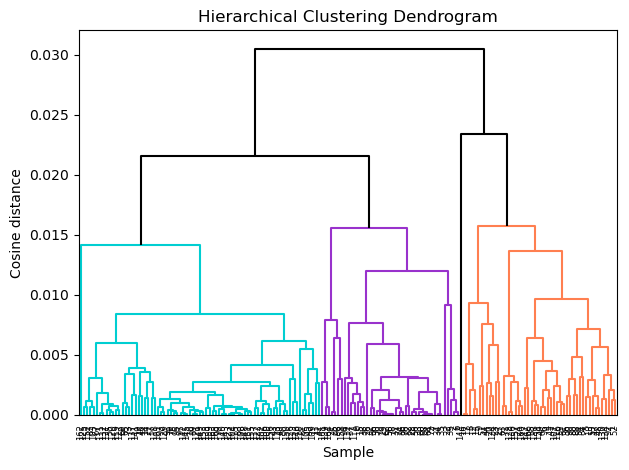

In [25]:
    # Create linkages for the hierarchical clustering dendrogram. Cosine metric
    # is used because the location of the signal (time point) is a better base
    # of clustering than the signal amplitude.
    Z = linkage(data, 'average', metric = 'cosine')
    
    plot_hierarchical_clustering_dendrogram(Z, save_fig = False, 
                                            sample_labels = True)
    
    # Set the number of clusters for to four as the dendrogram suggests there
    # would be four clusters.
    k = 4
    
    # Divide the data into k clusters.
    L = fcluster(Z, k, criterion='maxclust')
    L = L - 1 # Re-index because all the plot functions implemented here assume cluster numbering starts from 0.

# HIERARCHICAL CLUSTERING ANALYSIS (OUTLIERS)
 
Are there individual samples that would be clustered into their own cluster? Or very small clusters? These may be outliers and should be dropped if they look like that after detailed analysis.


In [26]:
    print(np.where(L==3))
    print(sample_df.iloc[np.where(L==3)[0], :])


(array([144]),)
     Unnamed: 0 Comments                                   Sample  CsPbI  \
144           5  With Br  #5-C2-G3-CsPbI0.05 FAPbI0.83 MAPbI0.12    0.05   

     FAPbI  MAPbI Unnamed: 6  
144   0.83   0.12        NaN  


The above sample always clusters to its own and turns out it is  one of the reference samples containing Br, unlike the other samples. Br is also not in the target compositional region of this analysis. Let's treat this composition as an outlier.

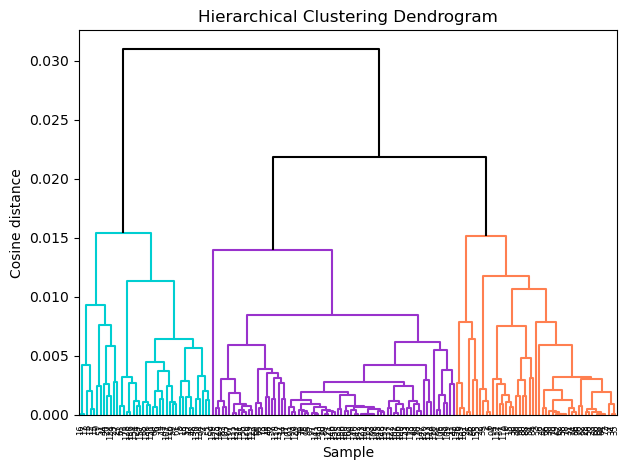

In [27]:
    to_be_dropped = np.where(sample_df == 'With Br')[0]
    cleaned_data, xy_cleaned, sample_df_cleaned, compositions_cleaned = drop_data(
        data, xy, sample_df, compositions, to_be_dropped)
    
    # Let's repeat the hierarchical clustering.
    Z = linkage(cleaned_data, 'average', metric = 'cosine')
    
    plot_hierarchical_clustering_dendrogram(Z, save_fig = False, 
                                            sample_labels = True)

Dendrogram plot now suggests there is 3 clusters in the data.


# CLUSTERING ANALYSIS (NUMBER OF CLUSTERS)
    
    
Let's test a range of number of clusters to confirm.
Score metrics:
 - Average silhouette score (with cosine metric): value close to 1 means very well defined clusters, -1 failed clustering, 0 overlapping clusters
 - Average Davies - Bouldin score (with Euclidean metric): value 0 is the best possible separation between the clusters, smaller value is better
 - Sample-by-sample silhouette score (with cosine metric): negative score of an individual sample means it has likely been clustered into the wrong cluster, generally, all the clusters should have most of the samples with at least as high silhouette score as the average value (dashed line)


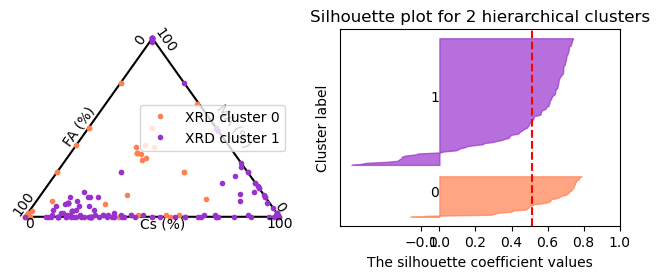

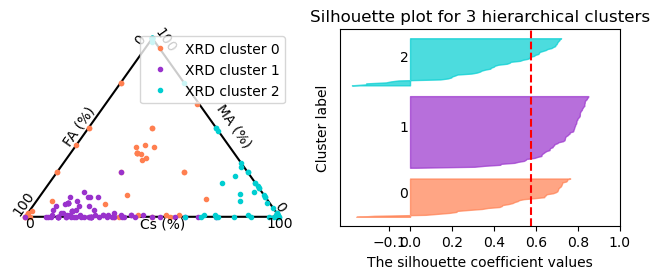

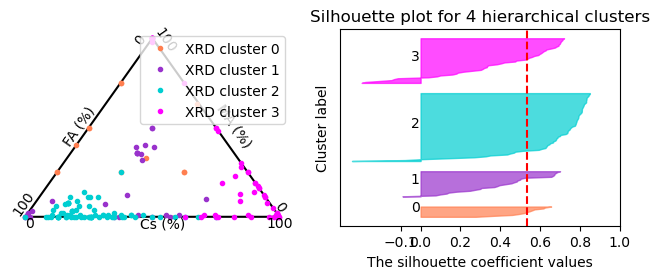

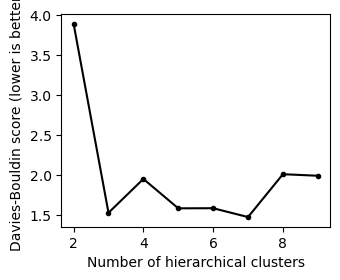

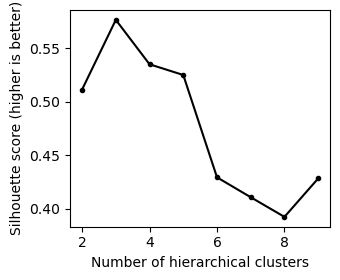

In [28]:
    score_hier_numbers_of_clusters(cleaned_data, xy_cleaned, cluster_colors,
                                       score_metric = 'cosine', 
                                       max_n_clusters = 10, 
                                       save_fig = True,
                                       filename = 'rgb_score_hier')
    


The graphs suggest three is indeed the right number of clusters for this dataset. Note that DB score uses Euclidean metric it is not as good score metric for this data as the silhouette score, so where DB and silhouette score suggest different number of clusters, silhouette is more reliable.
    
 For robustness, let's repeat the analysis also for k-means clustering algorithm. Note that the input data for k-means is in this implementation transformed with cosine kernel principal component analysis algorithm. This is because k-means uses Euclidean metric by default and we want to give weight on cosine metric, instead.


/home/armi/anaconda3/envs/clustering-perovskite-temp/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/armi/anaconda3/envs/clustering-perovskite-temp/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/armi/anaconda3/envs/clustering-perovskite-temp/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/armi/anaconda3/envs/clustering-perovskite-temp/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 

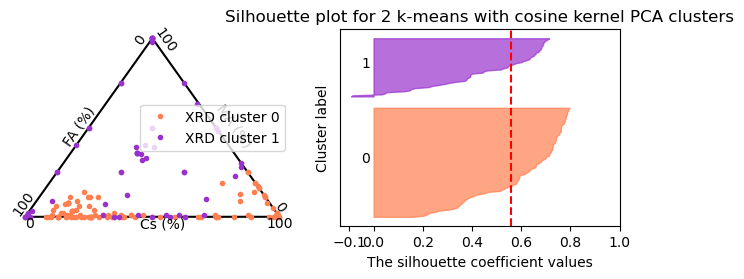

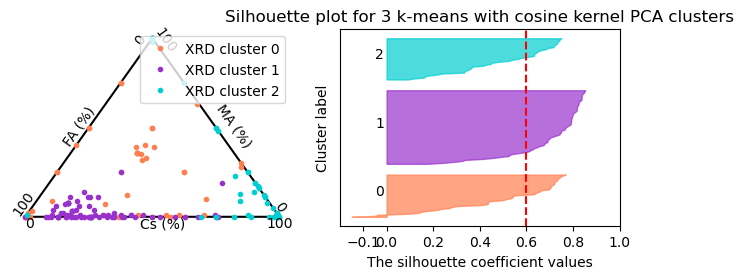

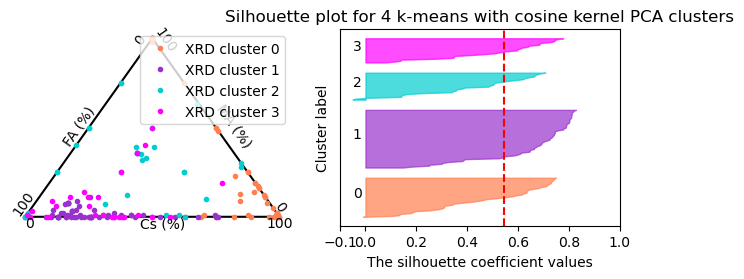

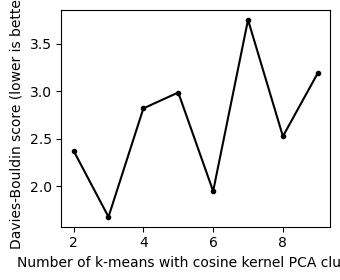

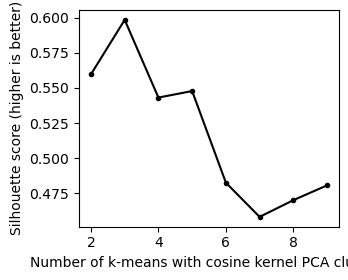

In [29]:
    score_kmeans_numbers_of_clusters(cleaned_data, xy_cleaned, cluster_colors,
                                       score_metric = 'cosine', 
                                       max_n_clusters = 10,
                                       save_fig = True,
                                       filename = 'rgb_score_kmeans')

The same result!
    


In [30]:
    # Set the number of clusters for the rest of the analysis to three.
    k = 3

# HIERARCHICAL CLUSTERING ANALYSIS (FINAL CLUSTERING)


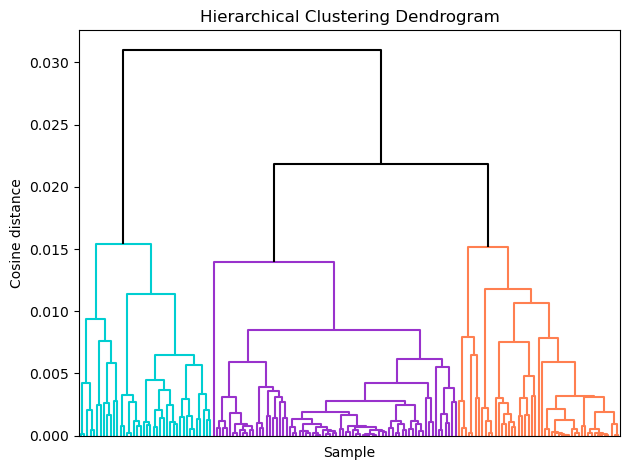

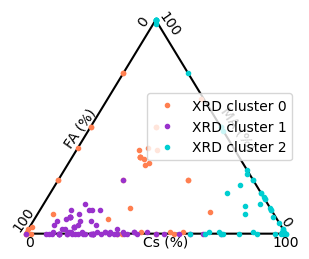

In [31]:
    Z = linkage(cleaned_data, 'average', metric = 'cosine')
    plot_hierarchical_clustering_dendrogram(Z, save_fig = True, 
                                                filename = 'rgb_hierarchical_clustering_dendrogram',
                                                sample_labels = False)
    
    # Divide the data into k clusters.
    L = fcluster(Z, k, criterion='maxclust')
    L = L - 1 # Re-index because all the plot functions implemented here assume cluster numbering starts from 0.
    
    plot_clusters_into_triangles(xy_cleaned, n_clusters = k, L=L,
                                 cluster_colors=cluster_colors,
                                 triangle_side_labels = ['Cs (%)', 'FA (%)', 'MA (%)'],
                                 to_single_plot = True)
    
    


# INVESTIGATE MOST TYPICAL XRD SPECTRA WITHIN EACH CLUSTER

Plot arithmetic mean (cluster center) and st.dev of the spectra in each cluster.


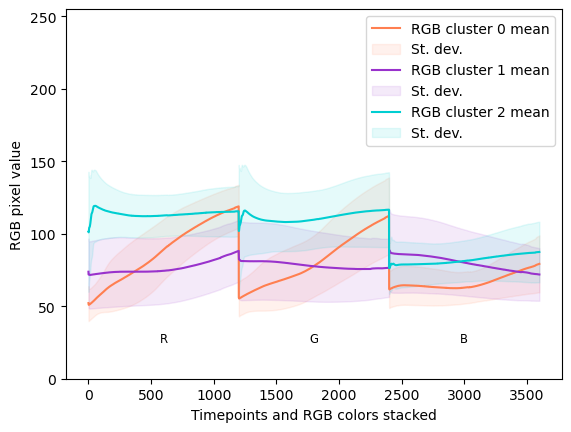

In [32]:
    mean, std = compute_cluster_mean_std(cleaned_data, L, k)
    
    plot_cluster_mean_spectra(time, mean, std, k, cluster_colors,
                             data_type = 'RGB', save_fig = True,
                             filename = 'xrd_cluster_mean')

The clusters indeed have differing signature spectra! Let's see how the real samples that resemble the cluster means they look the most.

Distance to the cluster mean value (XRD spectrum or degradation curve) i.e. finding the most typical sample in the cluster:
Minimum distance in cluster  0 :  438.49104436361887 , maximum distance:  5311.0776563124955
Index of the minimum distance sample:  92
Details of the min. distance sample:
 CsPbI    0.66
FAPbI    0.24
MAPbI    0.10
Name: 92, dtype: float64 
 Cs$_{0.66}$FA$_{0.24}$MA$_{0.10}$PbI$_3$ 

Distance to the cluster mean value (XRD spectrum or degradation curve) i.e. finding the most typical sample in the cluster:
Minimum distance in cluster  1 :  249.4423519366196 , maximum distance:  5311.0776563124955
Index of the minimum distance sample:  106
Details of the min. distance sample:
 CsPbI    0.41
FAPbI    0.58
MAPbI    0.01
Name: 106, dtype: float64 
 Cs$_{0.41}$FA$_{0.58}$MA$_{0.01}$PbI$_3$ 

Distance to the cluster mean value (XRD spectrum or degradation curve) i.e. finding the most typical sample in the cluster:
Minimum distance in cluster  2 :  421.85747714621397 , ma

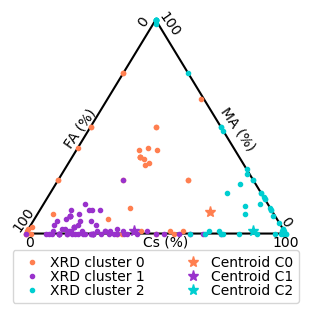

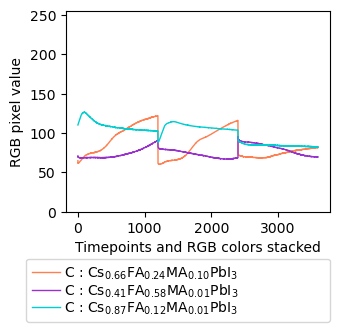

In [33]:
    # Extract the real samples that are the most typical to each cluster.
    cluster_rep, compos_str_cluster_rep, d = extract_most_typical_sample(
        cleaned_data, mean, k, compositions_cleaned, metric = 'euclidean')
    
    print('Aging test information for the most typical samples:\n',
          sample_df_cleaned.iloc[cluster_rep,:])
    
    # Plot them in the triangle.
    plt.figure()
    plot_clusters_into_triangles(xy_cleaned, k, L, cluster_colors,
                                    show = False)
    highlight_samples_in_cluster_triangle(xy_cleaned, k, cluster_colors,
                                              cluster_rep, cluster_rep_marker = '*',
                                              cluster_rep_label = 'Centroid C',
                                              savefig = True, filename = 'rgb_triangle')
    plt.show()
    
    # Plot their degradation curves.
    plot_spectra(time, cleaned_data, cluster_rep, 
                 ['C : ' + i for i in compos_str_cluster_rep],
                 cluster_colors, data_type = 'RGB')

# INVESTIGATE COMPOSITIONAL CENTROIDS OF EACH CLUSTER

Distance to the cluster compositional center i.e. finding the compositional centroid sample of each cluster:
Minimum distance in cluster  0 :  0.016768646337732406 , maximum distance:  1.4142135623730951
index of minimum distance sample:  14
Details of the min. distance sample:
 CsPbI    0.25
FAPbI    0.50
MAPbI    0.25
Name: 14, dtype: float64 
 Cs$_{0.25}$FA$_{0.50}$MA$_{0.25}$PbI$_3$ 

Distance to the cluster compositional center i.e. finding the compositional centroid sample of each cluster:
Minimum distance in cluster  1 :  0.015034656822512414 , maximum distance:  1.4142135623730951
index of minimum distance sample:  108
Details of the min. distance sample:
 CsPbI    0.25
FAPbI    0.71
MAPbI    0.04
Name: 108, dtype: float64 
 Cs$_{0.25}$FA$_{0.71}$MA$_{0.04}$PbI$_3$ 

Distance to the cluster compositional center i.e. finding the compositional centroid sample of each cluster:
Minimum distance in cluster  2 :  0.059421058058357505 , maximum distance:  1.4142135623730951
index of m

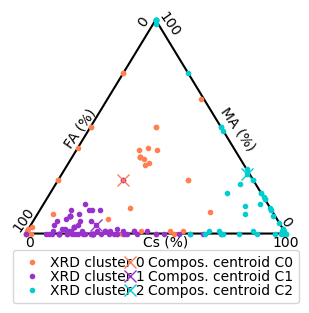

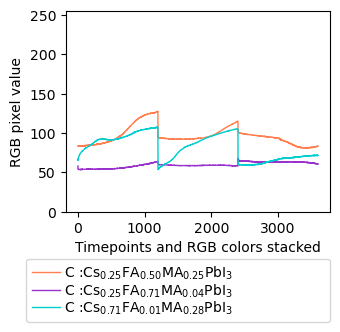

In [34]:
    mean_compos = compute_cluster_compositional_mean(cleaned_data, L, k,
                                           compositions_cleaned)
    
    # Extract the real sample nearest to the center.
    cluster_rep_compos, compos_str_cluster_rep_compos, d_compos = extract_compos_centroid_sample(
        cleaned_data, mean_compos, k, compositions_cleaned, metric = 'euclidean')
    
    # Plot them in the triangle.
    plt.figure()
    plot_clusters_into_triangles(xy_cleaned, k, L, cluster_colors,
                                    show = False)
    highlight_samples_in_cluster_triangle(xy_cleaned, k, cluster_colors,
                                          cluster_rep_compos,
                                          cluster_rep_marker = 'x',
                                          cluster_rep_label = 'Compos. centroid C')
    plt.show()
    
    # Plot their spectra.
    plot_spectra(time, cleaned_data, cluster_rep_compos, 
                 ['C :' + i for i in compos_str_cluster_rep_compos],
                 cluster_colors, data_type = 'RGB')

# FINAL PLOT


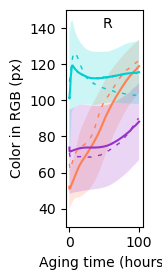

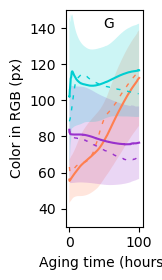

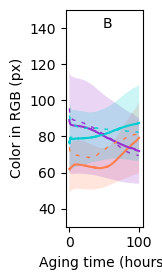

In [35]:
    rgb_timeseries_plot_for_paper(cleaned_data, k, time, mean, std, cluster_rep,
                                      cluster_colors)

# OPTIONAL: PLOT SUPPLEMENTARY FIGURES

Plot RGB degradation curves of the XRD centroid compositions.

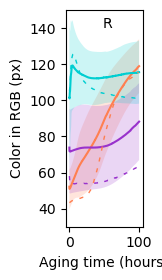

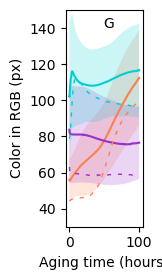

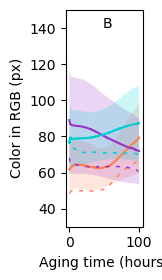

In [36]:

xrd_idx = [24, 108, 82]

rgb_timeseries_plot_for_paper(cleaned_data, k, time, mean, std, xrd_idx,
                                  cluster_colors,
                                  save_fig = True,
                                  filename = 'rgb_curves_of_xrd_centroids')